# Global Unicorn Companies EDA (2010-2022)

Author: Priyansh Jain

Tools Used: NumPy, Pandas, Matplotlib, Seaborn

Dataset: Unicorn_Companies.csv

Date: 10/8/2025

In [ ]:
In today’s rapidly evolving startup ecosystem, Unicorn companies — privately held
startups valued at over $1 billion — have become key indicators of innovation,
technological advancement, and investor confidence. While the term “Unicorn”
symbolizes the rarity of such companies, their numbers have surged over the past decade
across various industries and regions.
    
This report, “Global Unicorn Companies Report (2010–2022)”, analyzes unicorn trends
across industries and countries to uncover insights into their growth patterns, valuations,
and funding. Using NumPy, Pandas, Matplotlib, and Seaborn, the study transforms raw
data into meaningful visualizations that highlight key factors driving the rise of unicorns
worldwide

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading DataSet

In [4]:
df = pd.read_csv("Unicorn_Companies.csv")
df.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Investors Count
0,Bytedance,$140.00,07-Apr-17,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012.0,$7.44B,28.0
1,SpaceX,$100.30,01-Dec-12,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002.0,$6.874B,29.0
2,Stripe,$95.00,23-Jan-14,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010.0,$2.901B,39.0
3,Klarna,$45.60,12-Dec-11,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005.0,$3.472B,56.0
4,Epic Games,$42.00,26-Oct-18,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991.0,$4.377B,25.0


## 1. Exploring Dataset

In [5]:
df.shape

(1037, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1037 non-null   object 
 1   Valuation ($B)     1037 non-null   object 
 2   Date Joined        1037 non-null   object 
 3   Country            1037 non-null   object 
 4   City               1037 non-null   object 
 5   Industry           1037 non-null   object 
 6   Select Inverstors  1020 non-null   object 
 7   Founded Year       994 non-null    float64
 8    Total Raised      1037 non-null   object 
 9   Investors Count    1036 non-null   float64
dtypes: float64(2), object(8)
memory usage: 81.1+ KB


## 2. Data Cleaning and Type Conversion

#### Clean numeric columns

In [13]:
df['Valuation ($B)'] = df['Valuation ($B)'].replace(r'[\$,]', '').astype(float)
df[' Total Raised '] = df[' Total Raised '].replace('[\$,B,M]', '').astype(float)
df['Investors Count'] = pd.to_numeric(df['Investors Count'], errors='coerce')

#### Convert date fields

In [18]:
df['Date Joined'] = pd.to_datetime(df['Date Joined'])
df['Year Joined'] = df['Date Joined'].dt.year
df['Founded Year'] = pd.to_numeric(df['Founded Year'])

#### Adding Columns

In [19]:
df['Company Age (2025)'] = 2025 - df['Founded Year']
df['Time_to_Unicorn'] = df['Year Joined'] - df['Founded Year']
df['Funding Efficiency'] = df['Valuation ($B)'] / df[' Total Raised ']

In [22]:
df = df.drop(columns=['Select Inverstors'])

## 3. Data Overview

In [20]:
df.describe()

,Valuation ($B),Date Joined,Founded Year,Total Raised,Investors Count,Year Joined,Company Age (2025),Time_to_Unicorn,Funding Efficiency
count,1037.000000,1037,994.000000,1009.000000,1036.000000,1037.000000,994.000000,994.000000,1009.000000
mean,3.292083,2020-04-25 06:44:05.323047168,2012.710262,0.578049,14.432432,2019.820636,12.289738,7.123742,17.194977
min,1.000000,2007-07-20 00:00:00,1919.000000,0.001000,1.000000,2007.000000,4.000000,-4.000000,0.361709
25%,1.080000,2019-04-23 00:00:00,2011.000000,0.228580,8.000000,2019.000000,9.000000,4.000000,3.419187
50%,1.600000,2021-03-17 00:00:00,2014.000000,0.381000,13.000000,2021.000000,11.000000,6.000000,5.213270
75%,3.100000,2021-09-08 00:00:00,2016.000000,0.640000,19.000000,2021.000000,14.000000,9.000000,7.936508
max,140.000000,2022-02-28 00:00:00,2021.000000,7.440000,91.000000,2022.000000,106.000000,98.000000,4225.352113
std,7.309781,NaN,5.942876,0.736652,9.946537,1.999189,5.942876,5.540638,161.659083


In [23]:
df.isnull().sum()

Company                0
Valuation ($B)         0
Date Joined            0
Country                0
City                   0
Industry               0
Founded Year          43
 Total Raised         28
Investors Count        1
Year Joined            0
Company Age (2025)    43
Time_to_Unicorn       43
Funding Efficiency    28
dtype: int64

In [24]:
df.duplicated().sum()

0

In [48]:
df.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Founded Year,Total Raised,Investors Count,Year Joined,Company Age (2025),Time_to_Unicorn,Funding Efficiency
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,2012.0,7.440,28.0,2017,13.0,5.0,18.817204
1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,2002.0,6.874,29.0,2012,23.0,10.0,14.591213
2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,2010.0,2.901,39.0,2014,15.0,4.0,32.747329
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,2005.0,3.472,56.0,2011,20.0,6.0,13.133641
4,Epic Games,42.0,2018-10-26,United States,Cary,Other,1991.0,4.377,25.0,2018,34.0,27.0,9.595613


## 4.  Global Data

In [25]:
total_unicorns = len(df)
total_countries = df['Country'].nunique()
total_industries = df['Industry'].nunique()
avg_valuation = df['Valuation ($B)'].mean()
avg_funding = df[' Total Raised '].mean()
avg_investors = df['Investors Count'].mean()

In [27]:
print(f"\n Total Unicorns: {total_unicorns}")
print(f" Countries Covered: {total_countries}")
print(f" Industries Covered: {total_industries}")
print(f" Avg Valuation: ${avg_valuation:.2f}B | Avg Funding: ${avg_funding:.2f}B")
print(f" Avg Investors per Company: {avg_investors:.1f}")


 Total Unicorns: 1037
 Countries Covered: 46
 Industries Covered: 33
 Avg Valuation: $3.29B | Avg Funding: $0.58B
 Avg Investors per Company: 14.4


## 5. Country Analysis

### Top 10 Countries by Number of Unicorns

C:\Users\priya\AppData\Local\Temp\ipykernel_18864\2066280334.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')


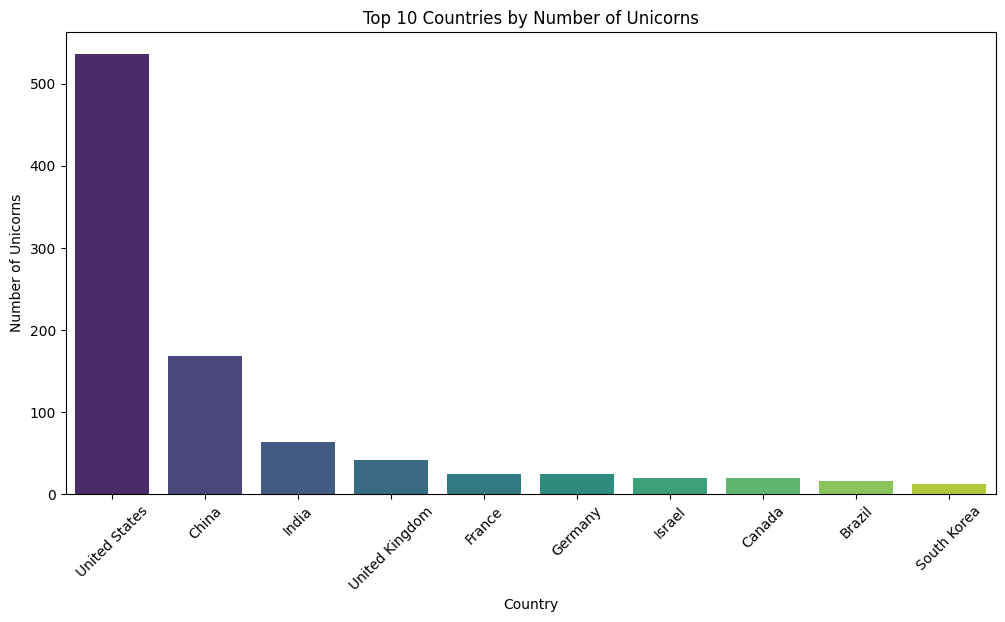

In [30]:
top_countries = df['Country'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.title("Top 10 Countries by Number of Unicorns")
plt.ylabel("Number of Unicorns")
plt.xticks(rotation=45)
plt.show()

### Top 10 Country By Total Valuation

C:\Users\priya\AppData\Local\Temp\ipykernel_18864\33819155.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_valuation.index, y=country_valuation.values, palette='coolwarm')


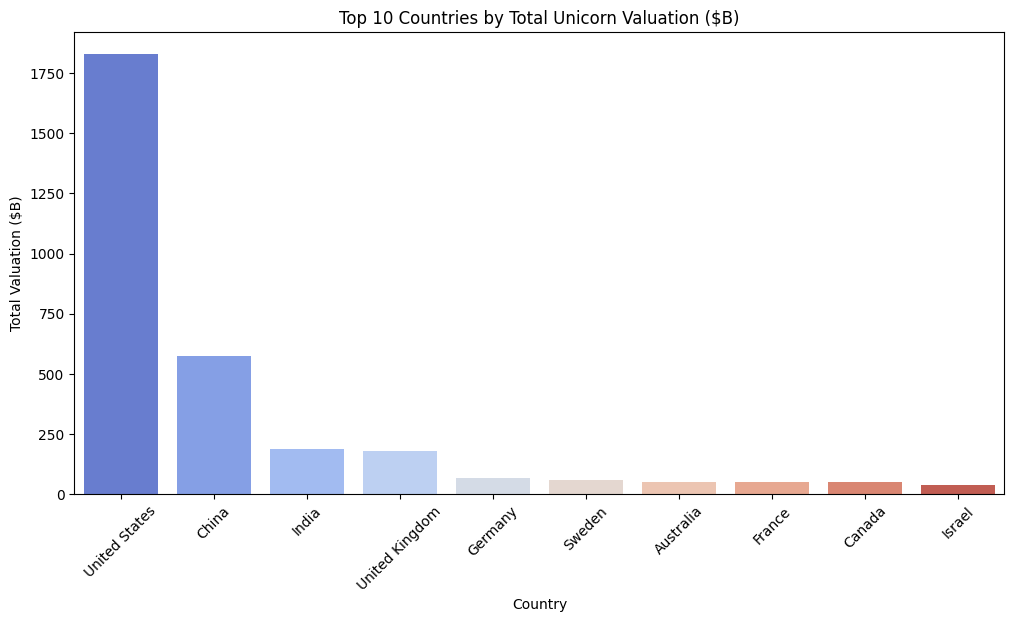

In [32]:
country_valuation = df.groupby('Country')['Valuation ($B)'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=country_valuation.index, y=country_valuation.values, palette='coolwarm')
plt.title("Top 10 Countries by Total Unicorn Valuation ($B)")
plt.ylabel("Total Valuation ($B)")
plt.xticks(rotation=45)
plt.show()

### Top 10 Fastest Unicorns (Years to Become Unicorn)

In [60]:
df = df[df['Time_to_Unicorn'] >= 0]
top_fast_unicorns = df.sort_values(by='Time_to_Unicorn', ascending=True).head(10)

print(top_fast_unicorns['Company'])

712                     Jokr
766               GlobalBees
987             Mensa Brands
561                candy.com
443               ClickHouse
140    Ola Electric Mobility
300                    Flink
862                   Playco
981                    Drata
99     Black Unicorn Factory
Name: Company, dtype: object


## 5. City Analysis

### Top 10 Cities by Number of Unicorns

C:\Users\priya\AppData\Local\Temp\ipykernel_18864\3815345079.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_city.index, y=top_city.values, palette='viridis')


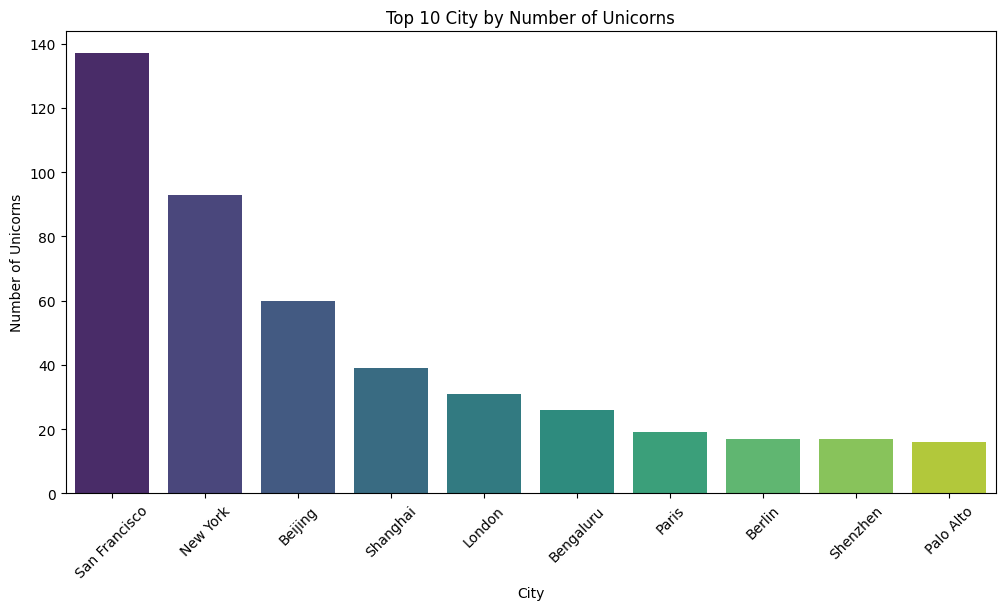

In [82]:
top_city = df['City'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_city.index, y=top_city.values, palette='viridis')
plt.title("Top 10 City by Number of Unicorns")
plt.ylabel("Number of Unicorns")
plt.xticks(rotation=45)
plt.show()

### Top 10 City By Total Valuation

C:\Users\priya\AppData\Local\Temp\ipykernel_18864\128424148.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_valuation.index, y=city_valuation.values, palette='coolwarm')


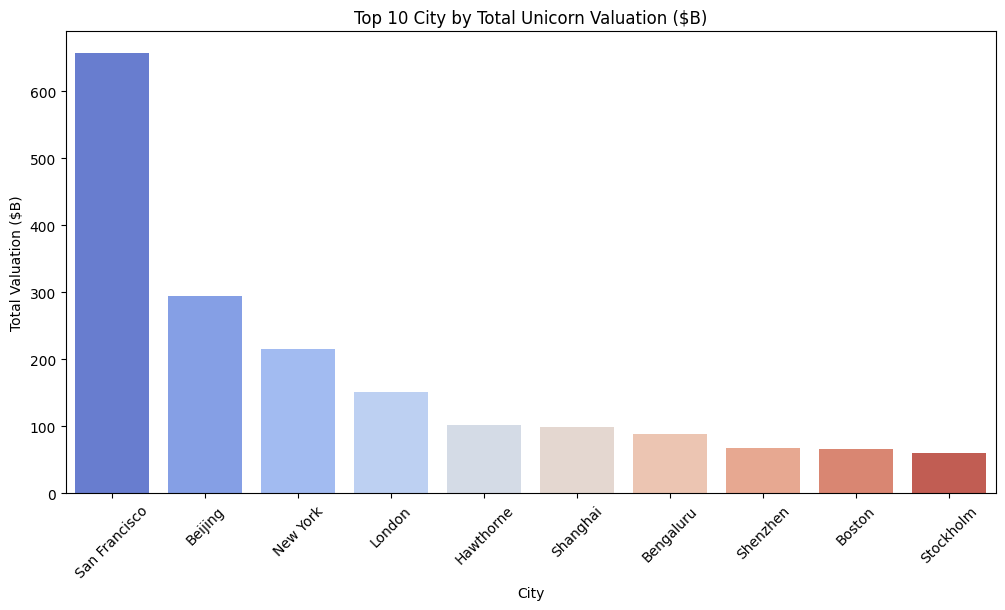

In [83]:
city_valuation = df.groupby('City')['Valuation ($B)'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=city_valuation.index, y=city_valuation.values, palette='coolwarm')
plt.title("Top 10 City by Total Unicorn Valuation ($B)")
plt.ylabel("Total Valuation ($B)")
plt.xticks(rotation=45)
plt.show()

## 6. Industry Analysis

### Top 10 Industries by Number of Unicorns

C:\Users\priya\AppData\Local\Temp\ipykernel_18864\450318975.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_Industries.index, y=top_Industries.values, palette='Spectral')


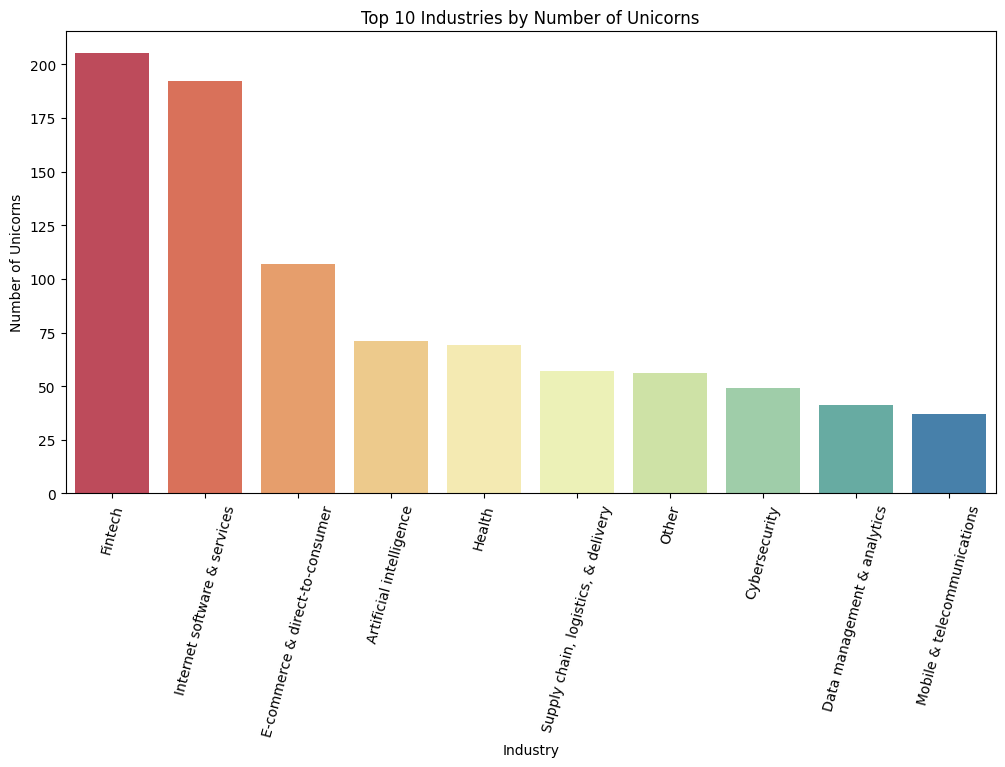

In [38]:
top_Industries = df['Industry'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_Industries.index, y=top_Industries.values, palette='Spectral')
plt.title("Top 10 Industries by Number of Unicorns")
plt.ylabel("Number of Unicorns")
plt.xticks(rotation=75)
plt.show()

### Top 10 Industries by Total Valuation

C:\Users\priya\AppData\Local\Temp\ipykernel_18864\3013464492.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Industry_valuation.index, y=Industry_valuation.values, palette='mako')


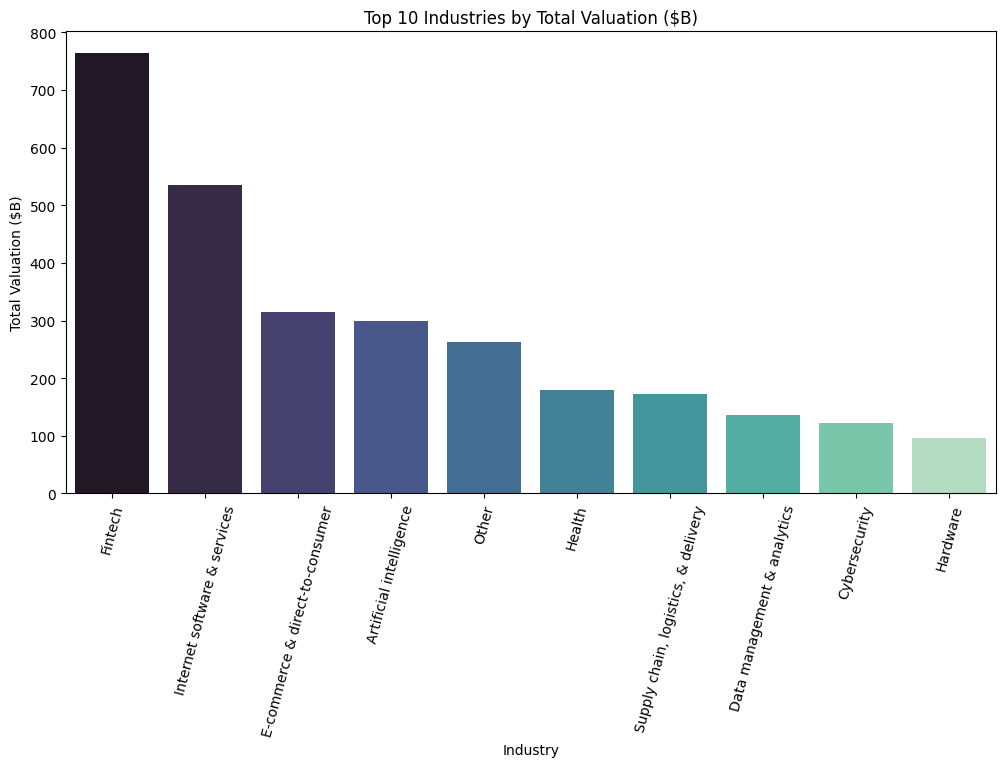

In [88]:
Industry_valuation = df.groupby('Industry')['Valuation ($B)'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=Industry_valuation.index, y=Industry_valuation.values, palette='mako')
plt.title("Top 10 Industries by Total Valuation ($B)")
plt.ylabel("Total Valuation ($B)")
plt.xticks(rotation=75)
plt.show()

## 7. Temporal Analysis

### Unicorns added each year

C:\Users\priya\AppData\Local\Temp\ipykernel_18864\726561146.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year Joined', data=df, palette='crest')


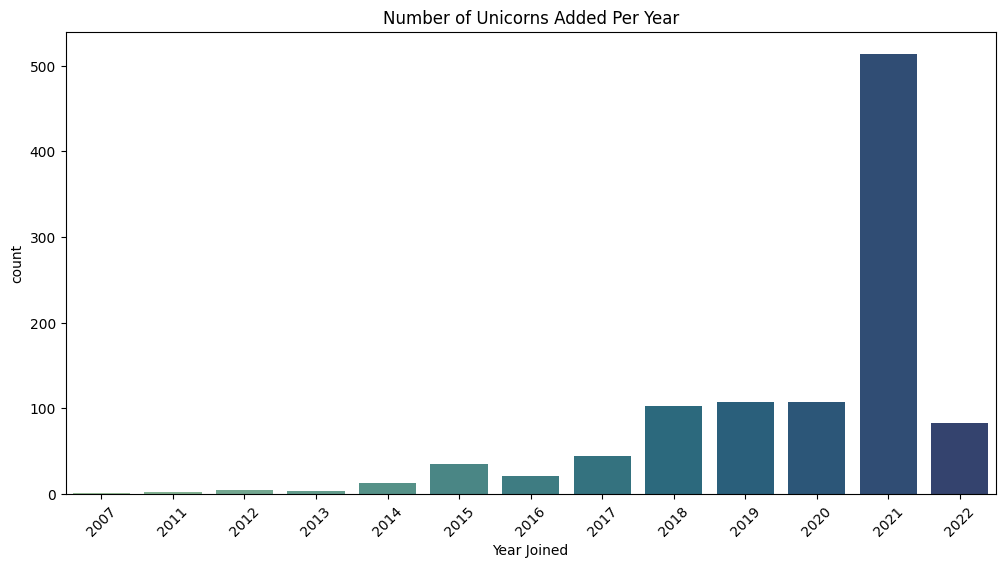

In [43]:
plt.figure(figsize=(12,6))
sns.countplot(x='Year Joined', data=df, palette='crest')
plt.title("Number of Unicorns Added Per Year")
plt.xticks(rotation=45)
plt.show()

### Total Valuation of New Unicorns Over Years

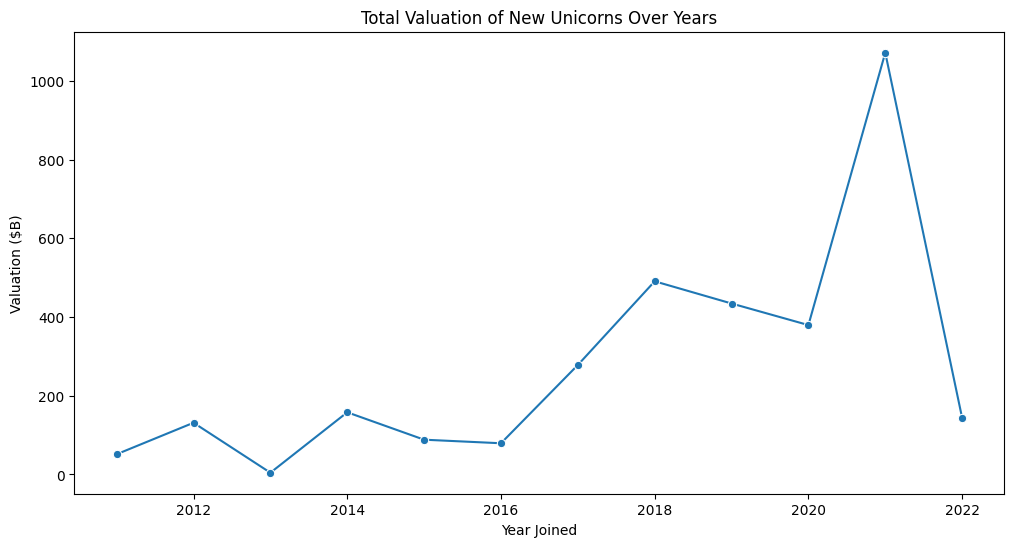

In [84]:
valuation_by_year = df.groupby('Year Joined')['Valuation ($B)'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='Year Joined', y='Valuation ($B)', data=valuation_by_year, marker='o')
plt.title("Total Valuation of New Unicorns Over Years")
plt.show()

### Time to become unicorn

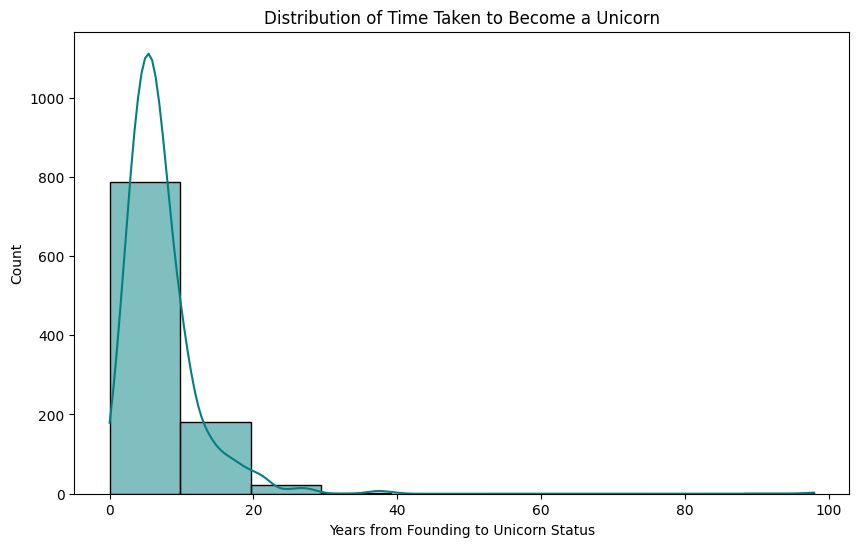

In [62]:
plt.figure(figsize=(10,6))
sns.histplot(df['Time_to_Unicorn'], bins=10, kde=True, color='teal')
plt.title("Distribution of Time Taken to Become a Unicorn")
plt.xlabel("Years from Founding to Unicorn Status")
plt.show()

In [63]:
print(f"Average Time to Unicorn: {df['Time_to_Unicorn'].mean():.2f} years")

Average Time to Unicorn: 7.13 years


## 8. Valuation & Funding Relationships

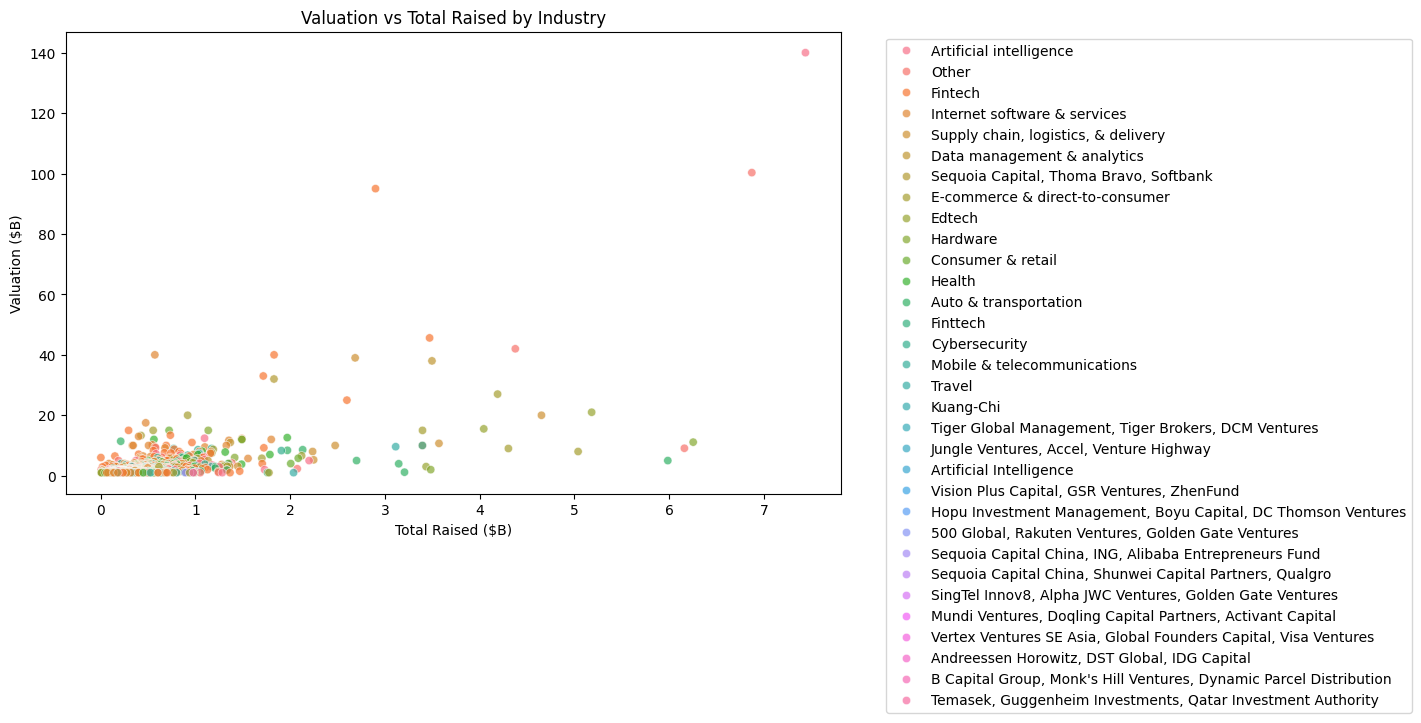

In [66]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=' Total Raised ', y='Valuation ($B)', data=df, hue='Industry', alpha=0.7)
plt.title("Valuation vs Total Raised by Industry")
plt.xlabel("Total Raised ($B)")
plt.ylabel("Valuation ($B)")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

### Correlation heatmap

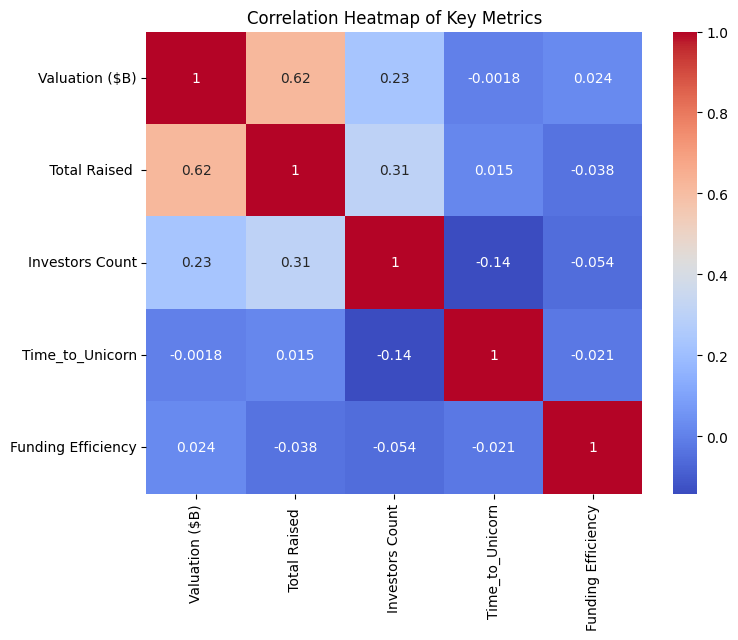

In [67]:
corr = df[['Valuation ($B)', ' Total Raised ', 'Investors Count', 'Time_to_Unicorn', 'Funding Efficiency']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Key Metrics")
plt.show()

## 9. Efficiency & Age Analysis

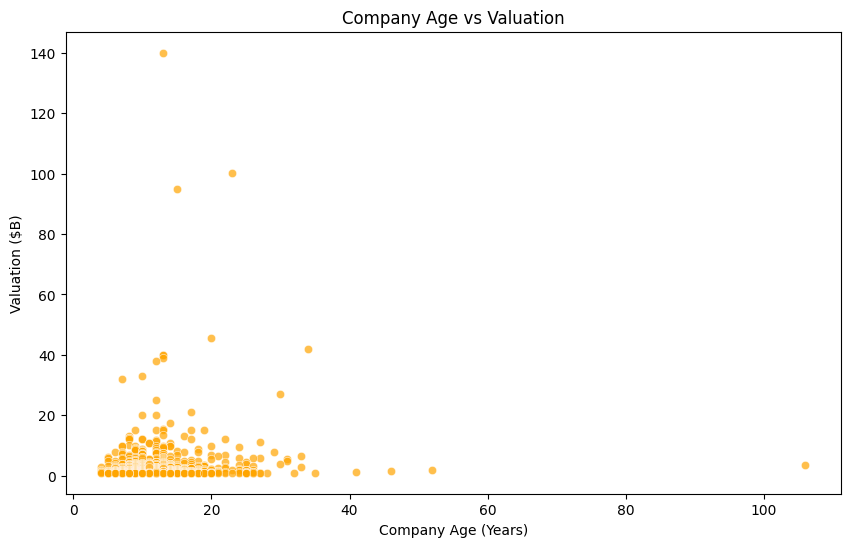

In [70]:
plt.figure(figsize=(10,6))

sns.scatterplot(x='Company Age (2025)', y='Valuation ($B)', data=df, color='orange', alpha=0.7)
plt.title("Company Age vs Valuation")
plt.xlabel("Company Age (Years)")
plt.ylabel("Valuation ($B)")
plt.show()

## 10. Top Performers & Insights

### Top 10 Companies by Valuation

C:\Users\priya\AppData\Local\Temp\ipykernel_18864\1023772425.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Company', x='Valuation ($B)', data=top10_value, palette='mako')


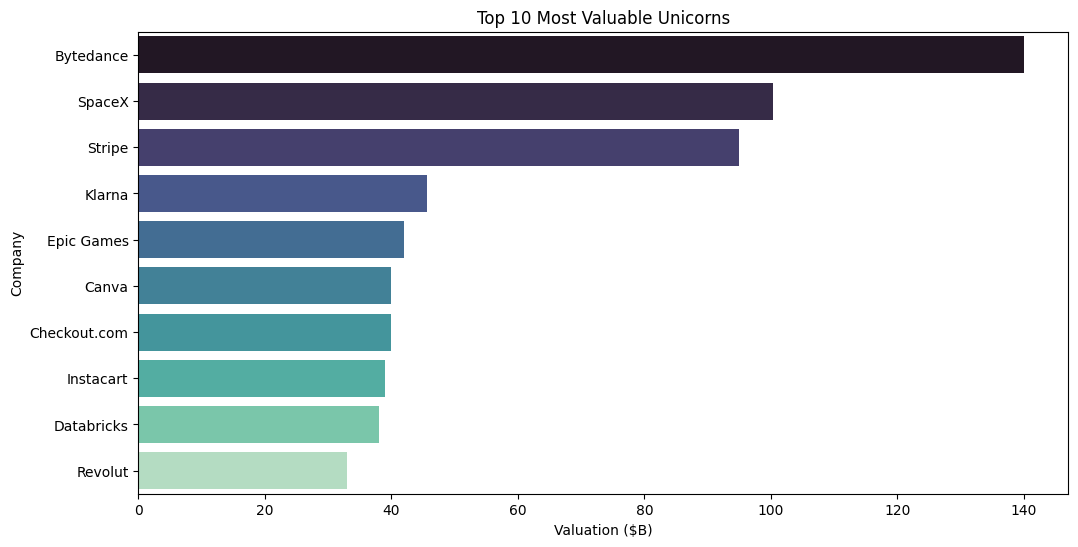

In [71]:
top10_value = df.nlargest(10, 'Valuation ($B)')
plt.figure(figsize=(12,6))

sns.barplot(y='Company', x='Valuation ($B)', data=top10_value, palette='mako')
plt.title("Top 10 Most Valuable Unicorns")
plt.xlabel("Valuation ($B)")
plt.ylabel("Company")
plt.show()

C:\Users\priya\AppData\Local\Temp\ipykernel_18864\1700293015.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Company', x='Time_to_Unicorn', data=fastest, palette='Greens')


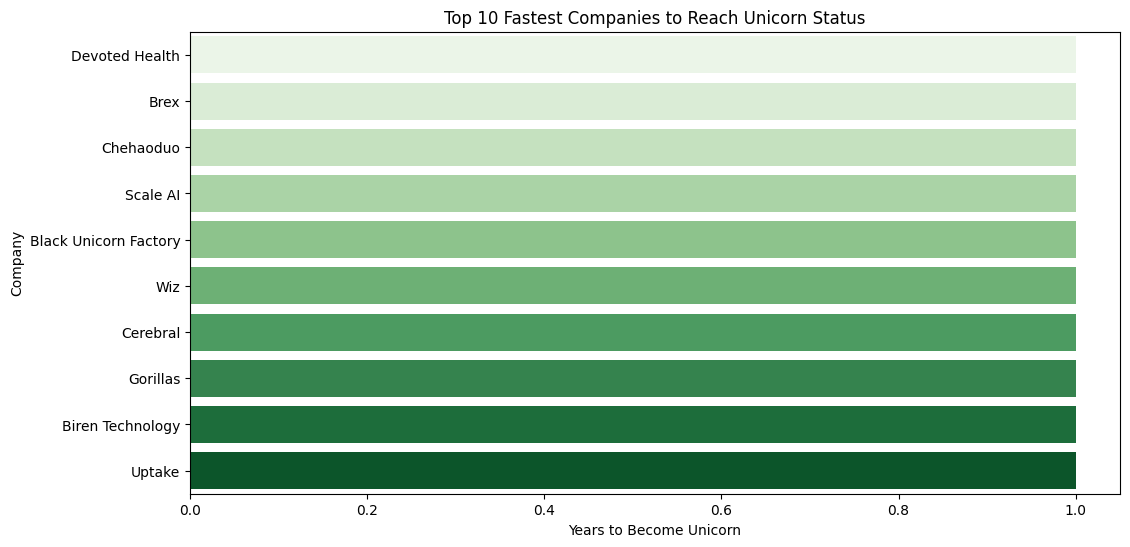

In [77]:
filtered_df = df[df['Time_to_Unicorn'] > 0]
fastest = filtered_df.nsmallest(10, 'Time_to_Unicorn')

plt.figure(figsize=(12,6))
sns.barplot(y='Company', x='Time_to_Unicorn', data=fastest, palette='Greens')
plt.title("Top 10 Fastest Companies to Reach Unicorn Status")
plt.xlabel("Years to Become Unicorn")
plt.ylabel("Company")
plt.show()

## 11. Summary Insights

- Total Unicorns: 1037
- Avg Valuation: $3.29B | Avg Funding: $0.58B
- Avg Time to Become Unicorn: 7.1 years
- USA, China, and India dominate in count and valuation.
- Fintech, AI, and E-commerce lead by valuation and funding.
- Positive correlation between Funding and Valuation.
- Efficient funding (high valuation, low capital) found mostly in AI & SaaS startups.
- 2020–2022 saw record unicorn growth globally post-pandemic.
- Younger companies are becoming unicorns faster than before